### 逻辑

我们先把图片转换成 RGB 矩阵，然后我们通过 K-Means 聚类，每个聚类的中心我们就可以认为是图片的主色。

### 加载图片

我们将使用matplotlib.image加载图像，然后通过遍历图像像素创建红、绿、蓝三色的一个DataFrame。

In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as img
from scipy.cluster.vq import kmeans, vq

sns.set(rc={"figure.figsize": (16, 9)})

In [2]:
image = img.imread("./data/flower.jpg")
image.shape

(1080, 1080, 3)

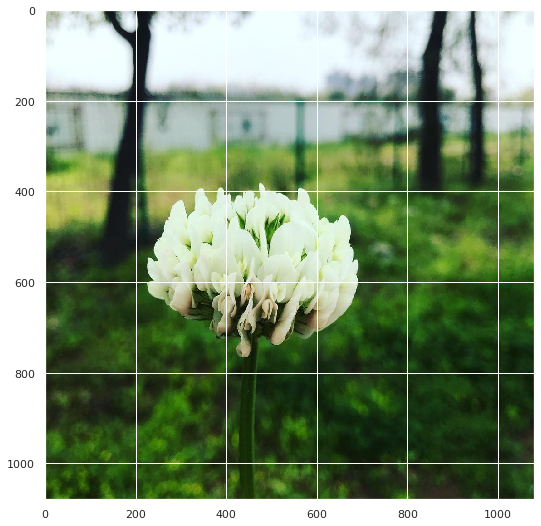

In [3]:
plt.imshow(image)

In [4]:
r = []
g = []
b = []
 
for row in image:
    for pixel in row:
        # A pixel contains RGB values
        r.append(pixel[0])
        g.append(pixel[1])
        b.append(pixel[2])
 
df = pd.DataFrame({'red':r, 'green':g, 'blue':b})
 
df.head()

,red,green,blue
0,207,215,202
1,205,213,200
2,202,210,197
3,202,210,197
4,202,210,197


现在我们可以用肘部法则来找到聚类K的个数

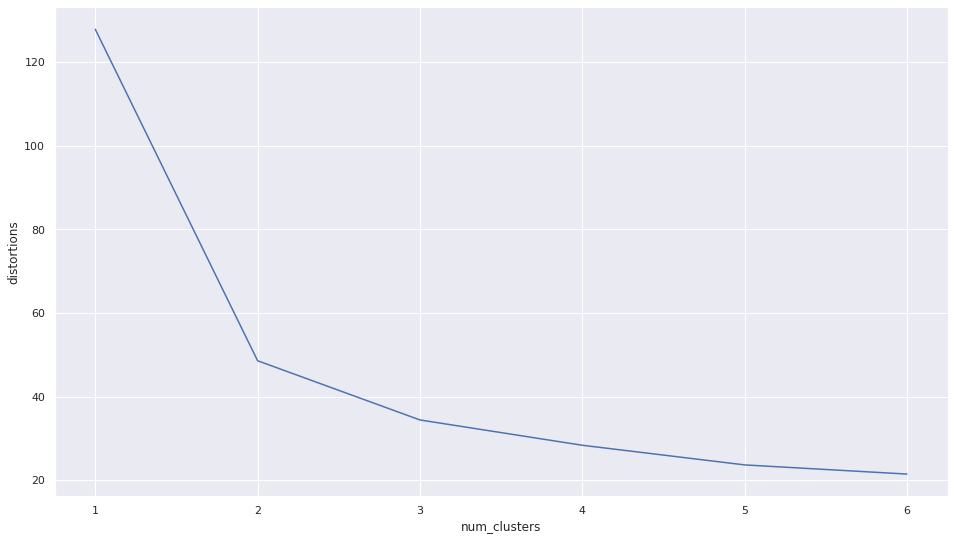

In [5]:
distortions = []
num_clusters = range(1, 7)
 
# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(df[['red','green','blue']].values.astype(float), i)
    distortions.append(distortion)
 
# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})
 
# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

现在我们可以看到 `K = 2` 比较合适

### K-Means 和 主颜色

主颜色即聚类的中心

In [6]:
cluster_centers, _ = kmeans(df[['red','green','blue']].values.astype(float), 2)
cluster_centers

array([[198.38116739, 212.50312211, 194.83354658],
       [ 44.14927839,  73.35793107,  27.8806393 ]])

我们需要将它们转成为1×k×3，其中k是簇的数量。并显示出来。

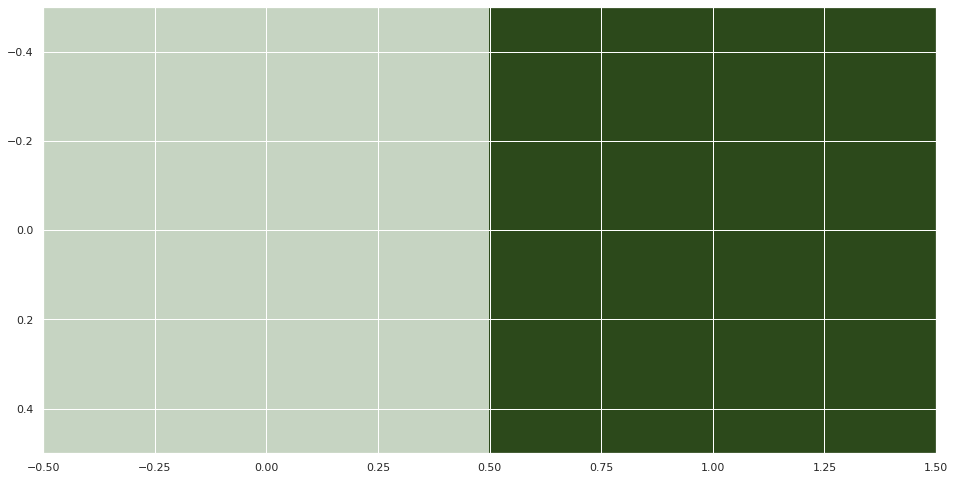

In [7]:
plt.imshow(cluster_centers.reshape(1,2,3)/255.)

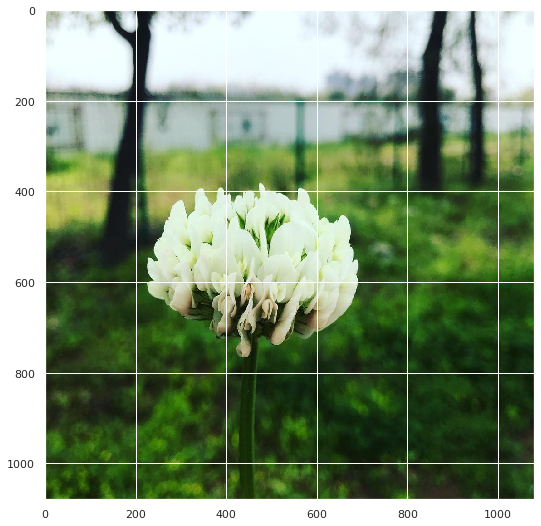

In [8]:
plt.imshow(image)

如果我们现在要给每个像素打上聚类标签，我们可以通过 `scipy.cluster.vq` 中的 `vq` 方法

In [9]:
# 打上标签
df['clusters'] = vq(df, cluster_centers)[0]
df.head()

,red,green,blue,clusters
0,207,215,202,0
1,205,213,200,0
2,202,210,197,0
3,202,210,197,0
4,202,210,197,0


### Web_colors，将 RGB 转换成 webcolors 颜色名称

https://www.wikiwand.com/en/Web_colors

In [10]:
# !pip install webcolors

In [11]:
import webcolors
 
def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

In [12]:
closest_colour(cluster_centers[1])

'darkslategray'